In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [2]:
from scipy.io import arff
import arff, numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pylab as plt
import scipy
from matplotlib import pyplot as plt
import matplotlib.mlab as mlab
from sklearn.preprocessing import LabelBinarizer

## creating a dataframe from arff file

In [3]:
list_data = list(arff.load('/Users/admin/Documents/Documents/JLU/3rd Sem/Project/credit_fruad.arff'))

In [4]:
df = pd.DataFrame(list_data)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,'<0',6.0,'critical/other existing credit',radio/tv,1169.0,'no known savings','>=7',4.0,'male single',none,...,'real estate',67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,'0<=X<200',48.0,'existing paid',radio/tv,5951.0,'<100','1<=X<4',2.0,'female div/dep/mar',none,...,'real estate',22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,'no checking',12.0,'critical/other existing credit',education,2096.0,'<100','4<=X<7',2.0,'male single',none,...,'real estate',49.0,none,own,1.0,'unskilled resident',2.0,none,yes,good
3,'<0',42.0,'existing paid',furniture/equipment,7882.0,'<100','4<=X<7',2.0,'male single',guarantor,...,'life insurance',45.0,none,'for free',1.0,skilled,2.0,none,yes,good
4,'<0',24.0,'delayed previously','new car',4870.0,'<100','1<=X<4',3.0,'male single',none,...,'no known property',53.0,none,'for free',2.0,skilled,2.0,none,yes,bad


In [6]:
names = ["over_draft", "credit_usage", "credit_history", "purpose", "current_balance", "Average_Credit_Balance", "employment", "location", "personal_status", "other_parties", "residence_since", "property_magnitude", "cc_age", "other_payment_plans", "housing", "existing_credits", "job", "num_dependents", "own_telephone", "foreign_worker", "class"]

In [7]:
df.shape

(1000, 21)

In [8]:
df.columns = names

In [9]:
df.head(1)

,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,...,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6.0,'critical/other existing credit',radio/tv,1169.0,'no known savings','>=7',4.0,'male single',none,...,'real estate',67.0,none,own,2.0,skilled,1.0,yes,yes,good


In [10]:
df['class'].value_counts()

good    700
bad     300
Name: class, dtype: int64

In [11]:
df.info()
# This tells us there are no null values in our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
over_draft                1000 non-null object
credit_usage              1000 non-null float64
credit_history            1000 non-null object
purpose                   1000 non-null object
current_balance           1000 non-null float64
Average_Credit_Balance    1000 non-null object
employment                1000 non-null object
location                  1000 non-null float64
personal_status           1000 non-null object
other_parties             1000 non-null object
residence_since           1000 non-null float64
property_magnitude        1000 non-null object
cc_age                    1000 non-null float64
other_payment_plans       1000 non-null object
housing                   1000 non-null object
existing_credits          1000 non-null float64
job                       1000 non-null object
num_dependents            1000 non-null float64
own_telephone             1000 non-null o

## checking for categories existing in numerical variables

In [12]:
df['credit_usage'].value_counts()
# These can be converted into categories for further analysis

24.0    184
12.0    179
18.0    113
36.0     83
6.0      75
15.0     64
9.0      49
48.0     48
30.0     40
21.0     30
10.0     28
27.0     13
60.0     13
42.0     11
11.0      9
20.0      8
8.0       7
4.0       6
45.0      5
7.0       5
39.0      5
14.0      4
13.0      4
33.0      3
28.0      3
54.0      2
16.0      2
22.0      2
72.0      1
47.0      1
5.0       1
26.0      1
40.0      1
Name: credit_usage, dtype: int64

In [13]:
df['current_balance'].value_counts()
# This variable is not very useful because average_credit_balance variable already exists

1258.0     3
1478.0     3
1393.0     3
1262.0     3
1275.0     3
3017.0     2
701.0      2
1236.0     2
4526.0     2
2333.0     2
1382.0     2
1442.0     2
2978.0     2
2039.0     2
1449.0     2
2578.0     2
1169.0     2
609.0      2
1237.0     2
2171.0     2
2406.0     2
6761.0     2
3349.0     2
1845.0     2
2384.0     2
433.0      2
5954.0     2
1386.0     2
1374.0     2
1199.0     2
          ..
2415.0     1
9283.0     1
674.0      1
1574.0     1
1228.0     1
3124.0     1
5293.0     1
3650.0     1
5084.0     1
3565.0     1
1445.0     1
1755.0     1
8588.0     1
1887.0     1
2225.0     1
1901.0     1
14421.0    1
6681.0     1
4795.0     1
4057.0     1
2503.0     1
1670.0     1
3021.0     1
2331.0     1
6229.0     1
790.0      1
1092.0     1
1893.0     1
2360.0     1
2096.0     1
Name: current_balance, Length: 921, dtype: int64

In [14]:
df['location'].value_counts()
# There exists a category here with values [1,2,3,4] But the meaning of the values is not clear

4.0    476
2.0    231
3.0    157
1.0    136
Name: location, dtype: int64

In [15]:
df['residence_since'].value_counts()
# There exists a category here with values [1,2,3,4] But the meaning is not clear whether the categories are in no. of yrs

4.0    413
2.0    308
3.0    149
1.0    130
Name: residence_since, dtype: int64

In [16]:
df['cc_age'].value_counts()
# These can be converted into categories for further analysis

27.0    51
26.0    50
23.0    48
24.0    44
28.0    43
25.0    41
35.0    40
30.0    40
36.0    39
31.0    38
29.0    37
32.0    34
33.0    33
34.0    32
37.0    29
22.0    27
40.0    25
38.0    24
42.0    22
39.0    21
46.0    18
47.0    17
41.0    17
44.0    17
43.0    17
45.0    15
49.0    14
20.0    14
21.0    14
48.0    12
50.0    12
54.0    10
57.0     9
52.0     9
63.0     8
51.0     8
55.0     8
61.0     7
53.0     7
60.0     6
66.0     5
65.0     5
64.0     5
58.0     5
74.0     4
59.0     3
56.0     3
68.0     3
67.0     3
62.0     2
75.0     2
19.0     2
70.0     1
Name: cc_age, dtype: int64

In [17]:
df['existing_credits'].value_counts()
# There exists a category here with values [1,2,3,4]

1.0    633
2.0    333
3.0     28
4.0      6
Name: existing_credits, dtype: int64

In [18]:
df['num_dependents'].value_counts()
# There exists a category here with values [1,2]

1.0    845
2.0    155
Name: num_dependents, dtype: int64

## What is the distribution of categorical features?

In [19]:
a = df.describe(include=['O'])
a

,over_draft,credit_history,purpose,Average_Credit_Balance,employment,personal_status,other_parties,property_magnitude,other_payment_plans,housing,job,own_telephone,foreign_worker,class
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,3,4,3,3,4,2,2,2
top,'no checking','existing paid',radio/tv,'<100','1<=X<4','male single',none,car,none,own,skilled,none,yes,good
freq,394,530,280,603,339,548,907,332,814,713,630,596,963,700


In [20]:
a.loc['%',:] = a.loc['freq',:]/a.loc['count',:]*100

In [21]:
a

,over_draft,credit_history,purpose,Average_Credit_Balance,employment,personal_status,other_parties,property_magnitude,other_payment_plans,housing,job,own_telephone,foreign_worker,class
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,3,4,3,3,4,2,2,2
top,'no checking','existing paid',radio/tv,'<100','1<=X<4','male single',none,car,none,own,skilled,none,yes,good
freq,394,530,280,603,339,548,907,332,814,713,630,596,963,700
%,39.4,53,28,60.3,33.9,54.8,90.7,33.2,81.4,71.3,63,59.6,96.3,70


## changing class variable from text to numerical categories

In [22]:
df["class"].unique()

array(['good', 'bad'], dtype=object)

In [23]:
def if_func14 (row):
        c = row['class']
        if c == 'good':
            return 0
        else:
            return 1

In [24]:
df["class"] = df.apply(if_func14, axis = "columns")

## Analyze by pivoting features

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
over_draft                1000 non-null object
credit_usage              1000 non-null float64
credit_history            1000 non-null object
purpose                   1000 non-null object
current_balance           1000 non-null float64
Average_Credit_Balance    1000 non-null object
employment                1000 non-null object
location                  1000 non-null float64
personal_status           1000 non-null object
other_parties             1000 non-null object
residence_since           1000 non-null float64
property_magnitude        1000 non-null object
cc_age                    1000 non-null float64
other_payment_plans       1000 non-null object
housing                   1000 non-null object
existing_credits          1000 non-null float64
job                       1000 non-null object
num_dependents            1000 non-null float64
own_telephone             1000 non-null o

In [26]:
df[['over_draft', 'class']].groupby(['over_draft'], as_index=False).mean().sort_values(by='class', ascending=False)

,over_draft,class
1,'<0',0.492701
0,'0<=X<200',0.390335
2,'>=200',0.222222
3,'no checking',0.116751


In [27]:
df[['credit_history', 'class']].groupby(['credit_history'], as_index=False).mean().sort_values(by='class', ascending=False)

,credit_history,class
4,'no credits/all paid',0.625000
0,'all paid',0.571429
3,'existing paid',0.318868
2,'delayed previously',0.318182
1,'critical/other existing credit',0.170648


In [28]:
df[['purpose', 'class']].groupby(['purpose'], as_index=False).mean().sort_values(by='class', ascending=False)

,purpose,class
4,education,0.440000
6,other,0.416667
1,'new car',0.380342
8,repairs,0.363636
3,business,0.350515
0,'domestic appliance',0.333333
5,furniture/equipment,0.320442
7,radio/tv,0.221429
2,'used car',0.165049
9,retraining,0.111111


In [29]:
df[['Average_Credit_Balance', 'class']].groupby(['Average_Credit_Balance'], as_index=False).mean().sort_values(by='class', ascending=False)

,Average_Credit_Balance,class
2,'<100',0.359867
0,'100<=X<500',0.330097
4,'no known savings',0.174863
1,'500<=X<1000',0.174603
3,'>=1000',0.125000


In [30]:
df[['employment', 'class']].groupby(['employment'], as_index=False).mean().sort_values(by='class', ascending=False)

,employment,class
2,'<1',0.406977
4,unemployed,0.370968
0,'1<=X<4',0.306785
3,'>=7',0.252964
1,'4<=X<7',0.224138


In [31]:
df[['personal_status', 'class']].groupby(['personal_status'], as_index=False).mean().sort_values(by='class', ascending=False)

,personal_status,class
1,'male div/sep',0.400000
0,'female div/dep/mar',0.351613
2,'male mar/wid',0.271739
3,'male single',0.266423


In [32]:
df[['other_parties', 'class']].groupby(['other_parties'], as_index=False).mean().sort_values(by='class', ascending=False)

,other_parties,class
0,'co applicant',0.439024
2,none,0.299890
1,guarantor,0.192308


In [33]:
df[['residence_since', 'class']].groupby(['residence_since'], as_index=False).mean().sort_values(by='class', ascending=False)

,residence_since,class
1,2.0,0.314935
3,4.0,0.300242
2,3.0,0.288591
0,1.0,0.276923


In [34]:
df[['property_magnitude', 'class']].groupby(['property_magnitude'], as_index=False).mean().sort_values(by='class', ascending=False)

,property_magnitude,class
1,'no known property',0.435065
3,car,0.307229
0,'life insurance',0.306034
2,'real estate',0.212766


In [35]:
df[['other_payment_plans', 'class']].groupby(['other_payment_plans'], as_index=False).mean().sort_values(by='class', ascending=False)

,other_payment_plans,class
0,bank,0.410072
2,stores,0.404255
1,none,0.275184


In [36]:
df[['housing', 'class']].groupby(['housing'], as_index=False).mean().sort_values(by='class', ascending=False)

,housing,class
0,'for free',0.407407
2,rent,0.391061
1,own,0.260870


In [37]:
df[['existing_credits', 'class']].groupby(['existing_credits'], as_index=False).mean().sort_values(by='class', ascending=False)

,existing_credits,class
3,4.0,0.333333
0,1.0,0.315956
1,2.0,0.276276
2,3.0,0.214286


In [38]:
df[['job', 'class']].groupby(['job'], as_index=False).mean().sort_values(by='class', ascending=False)

,job,class
0,'high qualif/self emp/mgmt',0.344595
1,'unemp/unskilled non res',0.318182
3,skilled,0.295238
2,'unskilled resident',0.280000


In [39]:
df[['num_dependents', 'class']].groupby(['num_dependents'], as_index=False).mean().sort_values(by='class', ascending=False)

,num_dependents,class
0,1.0,0.300592
1,2.0,0.296774


In [40]:
df[['own_telephone', 'class']].groupby(['own_telephone'], as_index=False).mean().sort_values(by='class', ascending=False)

,own_telephone,class
0,none,0.313758
1,yes,0.279703


In [41]:
df[['foreign_worker', 'class']].groupby(['foreign_worker'], as_index=False).mean().sort_values(by='class', ascending=False)

,foreign_worker,class
1,yes,0.307373
0,no,0.108108


## Few important obervations :
## Variables like credit_history, employment, other_parties, property_magnitude and foriegn_worker seem to have more impact on the class for few categories within the variable than others. So prediction must be made according to these variables.

## Analyze by visualizing data

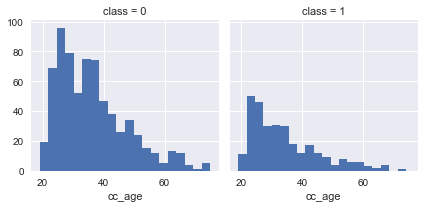

In [42]:
g = sns.FacetGrid(df, col='class')
g.map(plt.hist, 'cc_age', bins=20)

## visualizing data for both the class seperately, it can be observed that the data is similarly distributed for both 'good' and 'bad' applicant. Therefore age is also not a useful variable for prediction

## Converting categorical variables to numerical values

In [43]:
df_num = df.copy()

In [44]:
df.head(1)

,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,...,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6.0,'critical/other existing credit',radio/tv,1169.0,'no known savings','>=7',4.0,'male single',none,...,'real estate',67.0,none,own,2.0,skilled,1.0,yes,yes,0


In [45]:
df_num.head(1)

,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,...,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6.0,'critical/other existing credit',radio/tv,1169.0,'no known savings','>=7',4.0,'male single',none,...,'real estate',67.0,none,own,2.0,skilled,1.0,yes,yes,0


In [46]:
df_num["over_draft"].unique()

array(["'<0'", "'0<=X<200'", "'no checking'", "'>=200'"], dtype=object)

In [47]:
def if_func1 (row):
        od = row['over_draft']
        if od == "'no checking'":
            return 1
        elif od == "'<0'":
            return 2
        elif od == "'0<=X<200'":
            return 3
        else:
            return 4

In [48]:
df_num["over_draft"] = df_num.apply(if_func1, axis = "columns")

In [49]:
df_num["credit_history"].unique()

array(["'critical/other existing credit'", "'existing paid'",
       "'delayed previously'", "'no credits/all paid'", "'all paid'"], dtype=object)

In [50]:
def if_func2 (row):
        ch = row['credit_history']
        if ch == "'no credits/all paid'":
            return 1
        elif ch == "'all paid'":
            return 2
        elif ch == "'existing paid'":
            return 3
        elif ch == "'delayed previously'":
            return 4
        else:
            return 5

In [51]:
df_num["credit_history"] = df_num.apply(if_func2, axis = "columns")

In [52]:
df_num["purpose"].unique()

array(['radio/tv', 'education', 'furniture/equipment', "'new car'",
       "'used car'", 'business', "'domestic appliance'", 'repairs',
       'other', 'retraining'], dtype=object)

In [53]:
def if_func3 (row):
        pr = row['purpose']
        if pr == "radio/tv":
            return 1
        elif pr == "education":
            return 2
        elif pr == "furniture/equipment":
            return 3
        elif pr == "'new car'":
            return 4
        elif pr == "'used car'":
            return 5
        elif pr == "business":
            return 6
        elif pr == "'domestic appliance'":
            return 7
        elif pr == "repairs":
            return 8
        elif pr == "retraining":
            return 9
        else:
            return 10

In [54]:
df_num["purpose"] = df_num.apply(if_func3, axis = "columns")

In [55]:
df_num["Average_Credit_Balance"].unique()

array(["'no known savings'", "'<100'", "'500<=X<1000'", "'>=1000'",
       "'100<=X<500'"], dtype=object)

In [56]:
def if_func4 (row):
        acb = row['Average_Credit_Balance']
        if acb == "'<100'":
            return 1
        elif acb == "'100<=X<500'":
            return 2
        elif acb == "'500<=X<1000'":
            return 3
        elif acb == "'>=1000'":
            return 4
        else:
            return 5

In [57]:
df_num["Average_Credit_Balance"] = df_num.apply(if_func4, axis = "columns")

In [58]:
df_num["employment"].unique()

array(["'>=7'", "'1<=X<4'", "'4<=X<7'", 'unemployed', "'<1'"], dtype=object)

In [59]:
def if_func5 (row):
        ep = row['employment']
        if ep == "'<1'":
            return 1
        elif ep == "'1<=X<4'":
            return 2
        elif ep == "'4<=X<7'":
            return 3
        elif ep == "'>=7'":
            return 4
        else:
            return 5

In [60]:
df_num["employment"] = df_num.apply(if_func5, axis = "columns")

In [61]:
df_num["personal_status"].unique()

array(["'male single'", "'female div/dep/mar'", "'male div/sep'",
       "'male mar/wid'"], dtype=object)

In [62]:
def if_func6 (row):
        ps = row['personal_status']
        if ps == "'female div/dep/mar'":
            return 1
        elif ps == "'male single'":
            return 2
        elif ps == "'male mar/wid'":
            return 3
        else:
            return 4

In [63]:
df_num["personal_status"] = df_num.apply(if_func6, axis = "columns")

In [64]:
df_num["other_parties"].unique()

array(['none', 'guarantor', "'co applicant'"], dtype=object)

In [65]:
def if_func7 (row):
        op = row['other_parties']
        if op == 'guarantor':
            return 1
        elif op == "'co applicant'":
            return 2
        else:
            return 3

In [66]:
df_num["other_parties"] = df_num.apply(if_func7, axis = "columns")

In [67]:
df_num["property_magnitude"].unique()

array(["'real estate'", "'life insurance'", "'no known property'", 'car'], dtype=object)

In [68]:
def if_func8 (row):
        pm = row['property_magnitude']
        if pm == 'car':
            return 1
        elif pm == "'life insurance'":
            return 2
        elif pm == "'real estate'":
            return 3
        else:
            return 4

In [69]:
df_num["property_magnitude"] = df_num.apply(if_func8, axis = "columns")

In [70]:
df_num["other_payment_plans"].unique()

array(['none', 'bank', 'stores'], dtype=object)

In [71]:
def if_func9 (row):
        opp = row['other_payment_plans']
        if opp == 'bank':
            return 1
        elif opp == 'stores':
            return 2
        else:
            return 3

In [72]:
df_num["other_payment_plans"] = df_num.apply(if_func9, axis = "columns")

In [73]:
df_num["housing"].unique()

array(['own', "'for free'", 'rent'], dtype=object)

In [74]:
def if_func10 (row):
        h = row['housing']
        if h == 'own':
            return 1
        elif h == 'rent':
            return 2
        else:
            return 3

In [75]:
df_num["housing"] = df_num.apply(if_func10, axis = "columns")

In [76]:
df_num["job"].unique()

array(['skilled', "'unskilled resident'", "'high qualif/self emp/mgmt'",
       "'unemp/unskilled non res'"], dtype=object)

In [77]:
def if_func11 (row):
        j = row['job']
        if j == "'unemp/unskilled non res'":
            return 1
        elif j == "'unskilled resident'":
            return 2
        elif j == 'skilled':
            return 3
        else:
            return 4

In [78]:
df_num["job"] = df_num.apply(if_func11, axis = "columns")

In [79]:
df_num["own_telephone"].unique()

array(['yes', 'none'], dtype=object)

In [80]:
def if_func12 (row):
        ot = row['own_telephone']
        if ot == 'yes':
            return 0
        else:
            return 1

In [81]:
df_num["own_telephone"] = df_num.apply(if_func12, axis = "columns")

In [82]:
df_num["foreign_worker"].unique()

array(['yes', 'no'], dtype=object)

In [83]:
def if_func13 (row):
        fw = row['foreign_worker']
        if fw == 'no':
            return 0
        else:
            return 1

In [84]:
df_num["foreign_worker"] = df_num.apply(if_func13, axis = "columns")

## changing specific columns to category data type

In [85]:
df_num.columns

Index(['over_draft', 'credit_usage', 'credit_history', 'purpose',
       'current_balance', 'Average_Credit_Balance', 'employment', 'location',
       'personal_status', 'other_parties', 'residence_since',
       'property_magnitude', 'cc_age', 'other_payment_plans', 'housing',
       'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [86]:
for col in ['over_draft', 'credit_history', 'purpose',
       'Average_Credit_Balance', 'employment', 'location',
       'personal_status', 'other_parties', 'residence_since',
       'property_magnitude', 'other_payment_plans', 'housing',
       'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class']:
    df_num[col] = df_num[col].astype('category')

In [87]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
over_draft                1000 non-null category
credit_usage              1000 non-null float64
credit_history            1000 non-null category
purpose                   1000 non-null category
current_balance           1000 non-null float64
Average_Credit_Balance    1000 non-null category
employment                1000 non-null category
location                  1000 non-null category
personal_status           1000 non-null category
other_parties             1000 non-null category
residence_since           1000 non-null category
property_magnitude        1000 non-null category
cc_age                    1000 non-null float64
other_payment_plans       1000 non-null category
housing                   1000 non-null category
existing_credits          1000 non-null category
job                       1000 non-null category
num_dependents            1000 non-null category
own_telephone  

## Splitting into test and train df taking only the variables considered important

In [88]:
df_imp = df_num[['credit_history','employment','other_parties','property_magnitude','foreign_worker','class']]

In [89]:
train_df, test_df = train_test_split(df_imp, test_size=0.2)

In [90]:
train_df.shape

(800, 6)

In [91]:
test_df.shape

(200, 6)

In [92]:
X_train_df = train_df.drop("class", axis=1)
Y_train_df = train_df["class"]
X_test_df  = test_df.drop("class", axis=1)
Y_test_df = test_df["class"]
X_train_df.shape, Y_train_df.shape, X_test_df.shape, Y_test_df.shape

((800, 5), (800,), (200, 5), (200,))

In [93]:
X_test_df.head()

,credit_history,employment,other_parties,property_magnitude,foreign_worker
657,3,3,3,1,1
661,3,2,3,1,1
28,3,2,1,3,1
908,4,1,3,2,1
151,3,2,3,2,0


In [94]:
test_ids = list(X_test_df.index.values)

In [95]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train_df, Y_train_df)
Y_pred_log = logreg.predict(X_test_df)
acc_log = round(logreg.score(X_train_df, Y_train_df) * 100, 2)
acc_log

71.0

In [135]:
pd.crosstab(Y_test_df, Y_pred_log, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,142,4,146
1,48,6,54
All,190,10,200


In [145]:
48*5+4*1

244

In [96]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test_df,Y_pred_log)
print(confusion_matrix)

[[142   4]
 [ 48   6]]


In [97]:
coeff_df = pd.DataFrame(X_train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
2,property_magnitude,0.158615
3,foreign_worker,0.088173
1,other_parties,-0.136667
0,employment,-0.497581


In [98]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_df, Y_train_df)
Y_pred_dec = decision_tree.predict(X_test_df)
acc_decision_tree = round(decision_tree.score(X_train_df, Y_train_df) * 100, 2)
acc_decision_tree

76.75

In [134]:
pd.crosstab(Y_test_df, Y_pred_dec, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,139,7,146
1,46,8,54
All,185,15,200


In [144]:
46*5+7*1

237

In [99]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test_df,Y_pred_dec)
print(confusion_matrix)

[[139   7]
 [ 46   8]]


In [100]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train_df, Y_train_df)
Y_pred_ran = random_forest.predict(X_test_df)
acc_random_forest = round(random_forest.score(X_train_df, Y_train_df) * 100, 2)
acc_random_forest

76.75

In [136]:
pd.crosstab(Y_test_df, Y_pred_ran, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,137,9,146
1,47,7,54
All,184,16,200


In [143]:
47*5+9*1

244

In [101]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test_df,Y_pred_ran)
print(confusion_matrix)

[[137   9]
 [ 47   7]]


In [102]:
importances = random_forest.feature_importances_

In [103]:
print(importances)

[ 0.33863517  0.29193017  0.11813318  0.21354542  0.03775605]


In [104]:
indices = np.argsort(importances)

In [105]:
features = test_df.columns

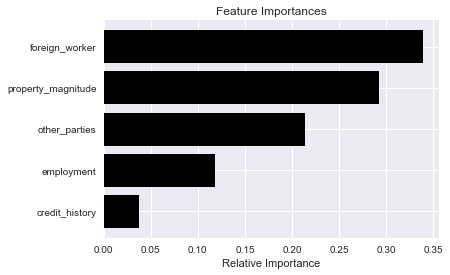

In [106]:
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='black', align='center')
plt.yticks(range(len(indices)), features) ## removed [indices]
plt.xlabel('Relative Importance')
plt.show()

In [107]:
test_df['predictions'] = Y_pred_ran

/Users/admin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [108]:
test_df['diff'] = test_df['class'] - test_df['predictions']

/Users/admin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [109]:
test_df[test_df['diff'] != 0]

,credit_history,employment,other_parties,property_magnitude,foreign_worker,class,predictions,diff
661,3,2,3,1,1,1,0,1
315,2,4,3,1,1,1,0,1
861,4,2,3,1,1,1,0,1
566,3,3,3,1,1,1,0,1
652,3,4,2,3,1,1,0,1
885,3,1,3,2,1,1,0,1
454,3,3,2,2,1,1,0,1
780,5,3,1,3,1,1,0,1
585,3,2,3,3,1,1,0,1
17,1,1,3,1,1,0,1,-1


## Splitting into test and train df

In [110]:
train, test = train_test_split(df_num, test_size=0.2)

In [111]:
train.shape

(800, 21)

In [112]:
test.shape

(200, 21)

In [113]:
X_train = train.drop("class", axis=1)
Y_train = train["class"]
X_test  = test.drop("class", axis=1)
Y_test = test["class"]
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((800, 20), (800,), (200, 20), (200,))

In [114]:
X_test.head()

,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,residence_since,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
260,2,12.0,3,3,1657.0,1,2,2.0,2,3,2.0,3,27.0,3,1,1.0,3,1.0,1,1
776,1,36.0,5,4,3535.0,1,3,4.0,2,3,4.0,1,37.0,3,1,2.0,3,1.0,0,1
967,1,15.0,3,1,3568.0,1,4,4.0,1,3,2.0,1,54.0,1,2,1.0,4,1.0,0,1
731,2,24.0,3,1,1987.0,1,2,2.0,2,3,4.0,3,21.0,3,2,1.0,2,2.0,1,1
326,1,12.0,5,3,5801.0,5,4,2.0,2,3,4.0,2,49.0,3,2,1.0,3,1.0,0,1


In [115]:
test_id = list(X_test.index.values)

## Logistic Regression

In [116]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred_logi = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

75.0

In [137]:
pd.crosstab(Y_test, Y_pred_logi, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,132,16,148
1,36,16,52
All,168,32,200


In [142]:
36*5+16*1

196

In [117]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test,Y_pred_logi)
print(confusion_matrix)

[[132  16]
 [ 36  16]]


In [118]:
coeff_df = pd.DataFrame(X_train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
0,credit_usage,0.351172
7,personal_status,0.299466
14,existing_credits,0.294105
18,foreign_worker,0.161106
10,property_magnitude,0.132830
9,residence_since,0.088167
15,job,0.078026
3,current_balance,0.036793
1,credit_history,0.032525
17,own_telephone,0.030714


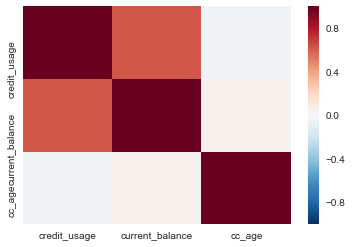

In [119]:
sns.heatmap(df_num.corr())
plt.show()

In [120]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred_deci = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

100.0

In [138]:
pd.crosstab(Y_test, Y_pred_deci, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,113,35,148
1,21,31,52
All,134,66,200


In [141]:
21*5+35*1

140

In [121]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test,Y_pred_deci)
print(confusion_matrix)

[[113  35]
 [ 21  31]]


In [122]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred_rand = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

100.0

In [139]:
pd.crosstab(Y_test, Y_pred_rand, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,136,12,148
1,28,24,52
All,164,36,200


In [140]:
28*5+12*1

152

In [123]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test,Y_pred_rand)
print(confusion_matrix)

[[136  12]
 [ 28  24]]


In [124]:
importances = random_forest.feature_importances_

In [125]:
print(importances)

[ 0.10440018  0.10103379  0.06278286  0.05887441  0.1321941   0.05550598
  0.0514055   0.04655666  0.03608934  0.01883929  0.03857525  0.0440286
  0.10196169  0.03035694  0.02674209  0.02031904  0.03187233  0.01366178
  0.0205496   0.00425059]


In [126]:
indices = np.argsort(importances)

In [127]:
features = test.columns

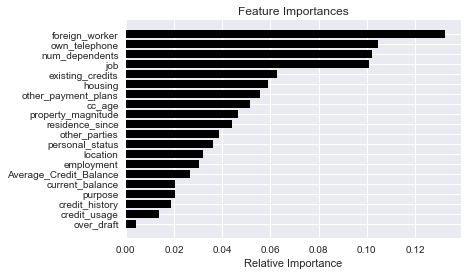

In [128]:
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='black', align='center')
plt.yticks(range(len(indices)), features) ## removed [indices]
plt.xlabel('Relative Importance')
plt.show()

In [129]:
test['predictions'] = Y_pred_rand

/Users/admin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [130]:
test['diff'] = test['class'] - test['predictions']

/Users/admin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [131]:
test[test['diff'] != 0]

,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,...,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,predictions,diff
731,2,24.0,3,1,1987.0,1,2,2.0,2,3,...,3,2,1.0,2,2.0,1,1,1,0,1
878,2,9.0,3,4,1422.0,1,1,3.0,2,3,...,3,3,1.0,4,1.0,0,1,1,0,1
118,2,33.0,5,3,4281.0,3,2,1.0,1,3,...,3,1,2.0,3,1.0,1,1,1,0,1
409,4,12.0,5,4,939.0,3,3,4.0,3,3,...,3,1,3.0,3,1.0,0,1,1,0,1
126,2,12.0,3,1,701.0,1,2,4.0,3,3,...,3,1,1.0,2,1.0,1,1,0,1,-1
465,2,24.0,3,5,2924.0,1,2,3.0,2,1,...,1,1,1.0,3,2.0,0,1,0,1,-1
796,2,18.0,3,5,7511.0,5,4,1.0,2,3,...,3,3,1.0,3,2.0,0,1,1,0,1
425,3,18.0,3,5,2779.0,1,2,1.0,3,3,...,3,2,1.0,3,1.0,0,1,0,1,-1
175,1,30.0,2,5,7485.0,5,5,4.0,1,3,...,1,1,1.0,4,1.0,0,1,1,0,1
828,2,36.0,3,5,8335.0,5,4,3.0,2,3,...,3,3,1.0,3,1.0,1,1,1,0,1
